In [1]:

import getdist
from getdist import plots, MCSamples
from getdist.paramnames import escapeLatex, makeList, mergeRenames
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
%matplotlib inline


g = plots.getSubplotPlotter(width_inch=8)

In [9]:
fiducial = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-nlfiducial_A.txt'
imprintpsf = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-psf5LSSTcov_A.txt'
#imprintresp = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-response2_A.txt'
fiducial_chains = np.genfromtxt(fiducial, names=True)
imprintpsf_chains = np.genfromtxt(imprintpsf, names=True)
#imprintresp_chains = np.genfromtxt(imprintresp, names=True)

Removed no burn in
Removed no burn in


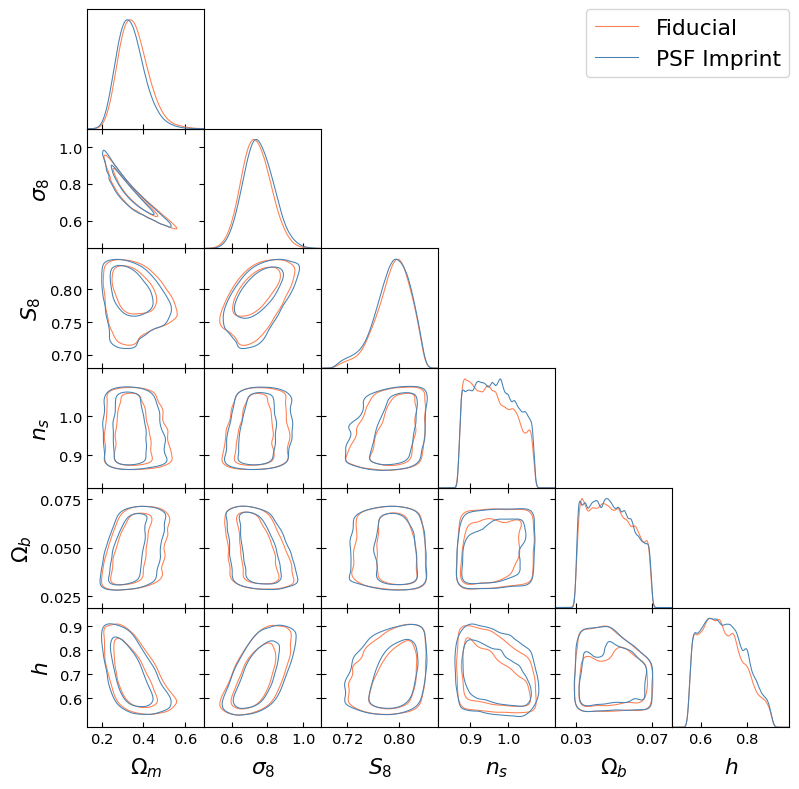

In [10]:

omm = 0.#,#0.03
oss = 0.#,#0.03
uu = fiducial_chains
fid_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                               (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s', '\Omega_b', 'h'])

uu = imprintpsf_chains
imprintpsf_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h'])

# uu = imprintresp_chains
# imprintresp_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
#                                 (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
#                                  uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
#                                  weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h'])



g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([fid_samples, imprintpsf_samples], ['Om', 'sigma8', 's8', 'ns', 'Ob', 'h0'], filled=[False,False,False, True], 
                colors=['coral','steelblue', 'green'], alphas=[1,1, 0.6, 0.6],
                legend_labels=['Fiducial', 'PSF Imprint', 'Response Imprint'],  legend_loc='upper right',fontsize=40, 
                contour_colors=['coral','steelblue', 'green'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])
plt.savefig('triangle_plot_LSST.png', dpi=600, bbox_inches='tight', transparent=True)

In [6]:
# Create a dummy plot to generate the legend
fig, ax = plt.subplots(figsize=(8, 6))

# Plot dummy lines for the legend
lines = [
    ax.plot([], [], color='coral', label='Fiducial')[0],
    ax.plot([], [], color='steelblue', label='PSF Imprint')[0],
    ax.plot([], [], color='green', label='Response Imprint')[0]
]

# Create the legend
legend = ax.legend(fontsize=20, loc='upper right', frameon=False)

# Remove the axes
ax.axis('off')

# Save the legend as a high-resolution image
fig.savefig('legend_high_res.png', dpi=300, bbox_inches='tight', transparent=True)
plt.close(fig)

Removed no burn in
Removed no burn in


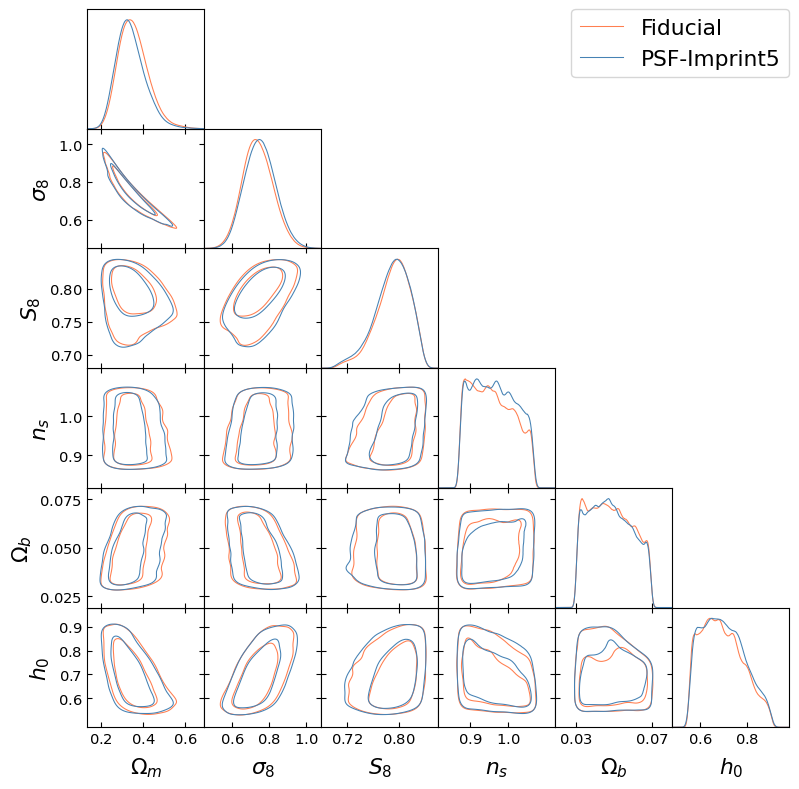

In [4]:
omm = 0.#,#0.03
oss = 0.#,#0.03
uu = fiducial_chains
fid_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                               (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s', '\Omega_b', 'h_0'])

uu = imprint_chains2
imprint_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h_0'])


g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([fid_samples, imprint_samples], ['Om', 'sigma8', 's8', 'ns', 'Ob', 'h0'], filled=[False,False,True, True], 
                colors=['coral','steelblue'], alphas=[1,1, 0.6],
                legend_labels=['Fiducial', 'PSF-Imprint5'],  legend_loc='upper right',fontsize=20, 
                contour_colors=['coral','steelblue'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])

Removed no burn in
Removed no burn in


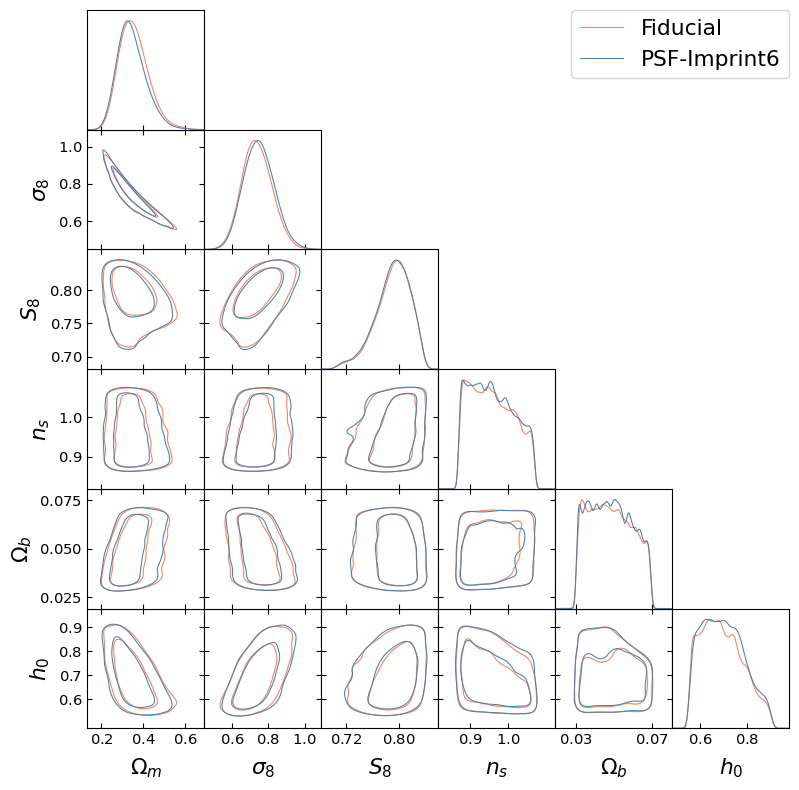

In [5]:
omm = 0.#,#0.03
oss = 0.#,#0.03
uu = fiducial_chains
fid_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                               (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s', '\Omega_b', 'h_0'])

uu = imprint_chains3
imprint_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h_0'])


g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([fid_samples, imprint_samples], ['Om', 'sigma8', 's8', 'ns', 'Ob', 'h0'], filled=[False,False,True, True], 
                colors=['coral','steelblue'], alphas=[1,1, 0.6],
                legend_labels=['Fiducial', 'PSF-Imprint6'],  legend_loc='upper right',fontsize=20, 
                contour_colors=['coral','steelblue'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])

Removed no burn in
Removed no burn in


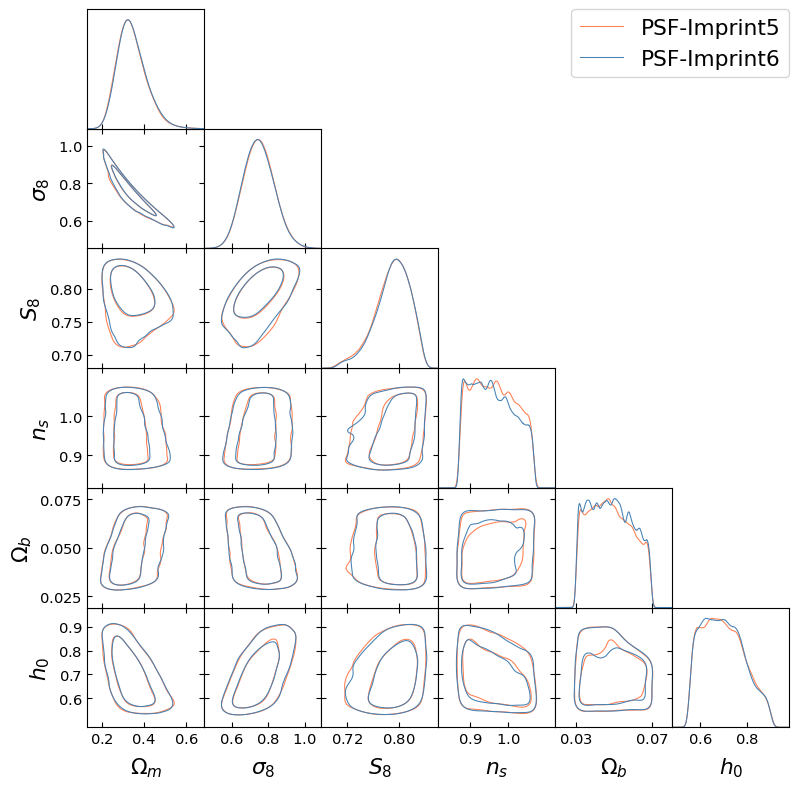

In [9]:
omm = 0.#,#0.03
oss = 0.#,#0.03
uu = imprint_chains2
fid_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                               (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s', '\Omega_b', 'h_0'])

uu = imprint_chains3
imprint_samples = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                 uu['cosmological_parametersn_s'], uu['cosmological_parametersomega_b'], uu['cosmological_parametersh0']],
                                 weights=np.exp(uu['log_weight']), names = ['Om','sigma8','s8','ns', 'Ob', 'h0'], labels = ['\Omega_{m}','\sigma_8','S_8','n_s','\Omega_b', 'h_0'])


g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([fid_samples, imprint_samples], ['Om', 'sigma8', 's8', 'ns', 'Ob', 'h0'], filled=[False,False,True, True], 
                colors=['coral','steelblue'], alphas=[1,1, 0.6],
                legend_labels=['PSF-Imprint5', 'PSF-Imprint6'],  legend_loc='upper right',fontsize=20, 
                contour_colors=['coral','steelblue'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])

Removed no burn in
Removed no burn in


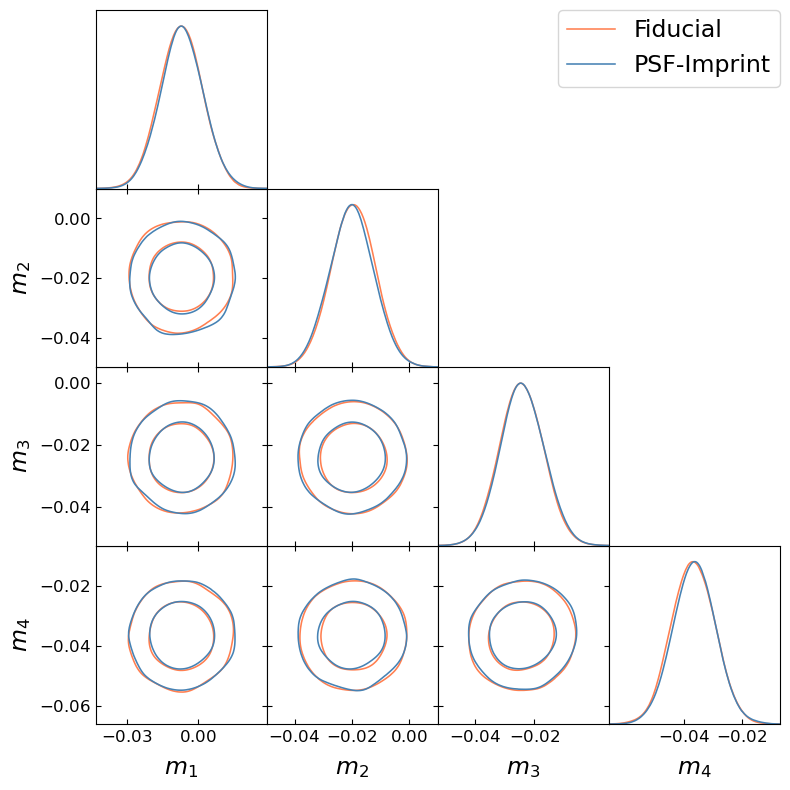

In [6]:
omm = 0.#,#0.03
oss = 0.#,#0.03
uu = fiducial_chains
fid_samples = MCSamples(samples=np.c_[uu['shear_calibration_parametersm1'],uu['shear_calibration_parametersm2'],
                               (uu['shear_calibration_parametersm3']), uu['shear_calibration_parametersm4']],
                                weights=np.exp(uu['log_weight']), names = ['m1','m2','m3','m4'], labels = ['m_1','m_2','m_3','m_4'])

uu = imprint_chains
imprint_samples = MCSamples(samples=np.c_[uu['shear_calibration_parametersm1'],uu['shear_calibration_parametersm2'],
                               (uu['shear_calibration_parametersm3']), uu['shear_calibration_parametersm4']],
                                weights=np.exp(uu['log_weight']), names = ['m1','m2','m3','m4'], labels = ['m_1','m_2','m_3','m_4'])

g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([fid_samples, imprint_samples], ['m1','m2','m3','m4'], filled=[False,False,True, True], 
                colors=['coral','steelblue'], alphas=[1,1, 0.6],
                legend_labels=['Fiducial', 'PSF-Imprint'],  legend_loc='upper right',fontsize=20, 
                contour_colors=['coral','steelblue'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])

In [6]:
g.add_text('LCDM 2x2pt 4 bins\nFiducial', fontsize = 20, y = 1.5)
# plt.draw()
# plt.show()
g.export('plot.pdf')



In [8]:
uu = chain_ss_4b_lcdm
ss_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m'],uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3),],
                                 weights=(uu['weight']), names = ['Om','sigma8','s8'], labels = ['\Omega_{m}','\sigma8','S_8'])

# uu = chain_fiducial_2x2_lcdm_4b
# fid_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m'],uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
#                                  (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3),],
#                                   weights=(uu['weight']), names = ['Om','sigma8','s8'], labels = ['\Omega_{m}','\sigma8','S_8'])

Removed no burn in


In [10]:
ss_4b_params = ss_4b.getParams()
# fid_4b_params = fid_4b.getParams()

In [11]:
print  ("Omega_m: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.Om),0.5*(ss_4b.twoTailLimits(ss_4b_params.Om, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.Om, 0.68)[0])))
#print  ("Omega_m: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.Om),0.5*(fid_4b.twoTailLimits(fid_4b_params.Om, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.Om, 0.68)[0])))


Omega_m: 0.320+-0.037


In [12]:
print  ("s8: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.s8),0.5*(ss_4b.twoTailLimits(ss_4b_params.s8, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.s8, 0.68)[0])))
#print  ("s8: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.s8),0.5*(fid_4b.twoTailLimits(fid_4b_params.s8, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.s8, 0.68)[0])))


s8: 0.778+-0.035


In [13]:
print  ("sigma8: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.sigma8),0.5*(ss_4b.twoTailLimits(ss_4b_params.sigma8, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.sigma8, 0.68)[0])))
#print  ("sigma8: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.sigma8),0.5*(fid_4b.twoTailLimits(fid_4b_params.sigma8, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.sigma8, 0.68)[0])))


sigma8: 0.758+-0.069
